**População**

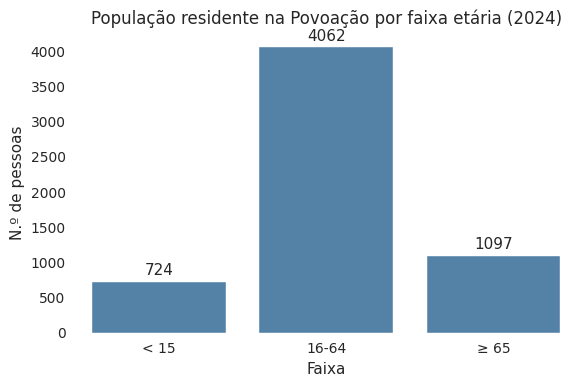

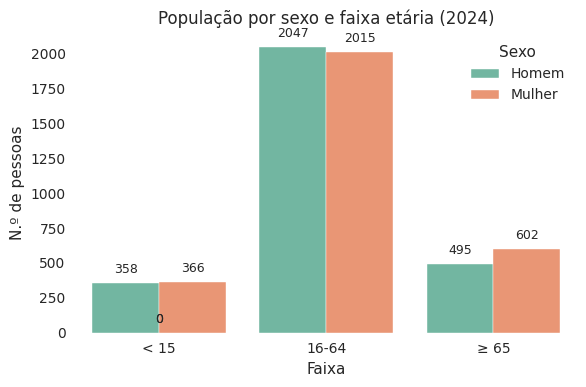

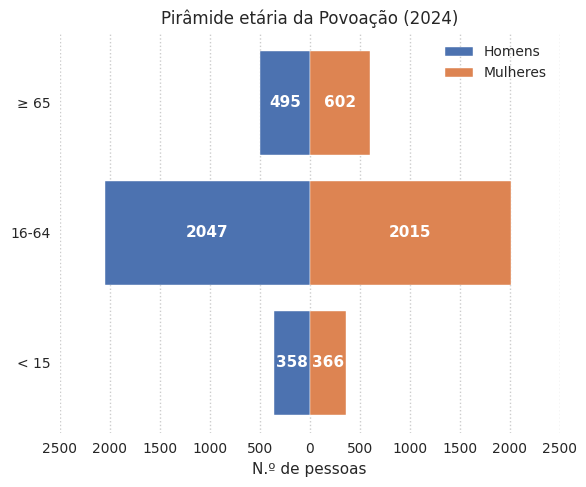

In [47]:
# -*- coding: utf-8 -*-
"""
Gráficos da população da Povoação (2024)
"""
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams["figure.facecolor"] = "white"   # fundo branco global
sns.set_palette("Set2")
sns.set_style("white")

# ---------- dados brutos ----------
total = 5883
homens = 2900
mulheres = 2983

faixas = ["< 15", "16-64", "≥ 65"]
homens_fx = [358, 2047, 495]
mulheres_fx = [366, 2015, 602]

# ---------- 1. População total por faixa ----------
df_total = pd.DataFrame({"Faixa": faixas, "Total": [724, 4062, 1097]})
plt.figure(figsize=(6, 4))
ax1 = sns.barplot(x="Faixa", y="Total", data=df_total, color="steelblue")
plt.title("População residente na Povoação por faixa etária (2024)")
plt.ylabel("N.º de pessoas")

# legendas em cima das barras
for bar in ax1.patches:
    h = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, h + 50,
             f"{int(h)}", ha='center', va='bottom')
plt.tight_layout()
plt.savefig("01_populacao_faixa_total.png", dpi=300, facecolor="white")
plt.show()

# ---------- 2. Homens vs Mulheres por faixa ----------
df_sexo = pd.DataFrame({
    "Faixa": faixas * 2,
    "Sexo": ["Homem"]*3 + ["Mulher"]*3,
    "Quantidade": homens_fx + mulheres_fx
})
plt.figure(figsize=(6, 4))
ax2 = sns.barplot(x="Faixa", y="Quantidade", hue="Sexo", data=df_sexo)
plt.title("População por sexo e faixa etária (2024)")
plt.ylabel("N.º de pessoas")

# legendas em cima de cada barra
for bar in ax2.patches:
    h = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, h + 50,
             f"{int(h)}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig("02_populacao_sexo_faixa.png", dpi=300, facecolor="white")
plt.show()

# ---------- 3. Pirâmide etária ----------
y = list(range(len(faixas)))
fig, ax = plt.subplots(figsize=(6, 5))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# barras
bh = ax.barh(y, [-h for h in homens_fx], label="Homens", color="#4c72b0")
bm = ax.barh(y, mulheres_fx, label="Mulheres", color="#dd8452")

# legendas dentro das barras (lado esquerdo usa valor positivo)
for i, (bar, v) in enumerate(zip(bh, homens_fx)):
    ax.text(-v/2, i, str(v), ha='center', va='center', color='white', fontweight='bold')
for i, (bar, v) in enumerate(zip(bm, mulheres_fx)):
    ax.text(v/2, i, str(v), ha='center', va='center', color='white', fontweight='bold')

# eixo x – valores positivos
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([str(abs(int(t))) for t in ticks])

ax.set_yticks(y)
ax.set_yticklabels(faixas)
ax.set_xlabel("N.º de pessoas")
ax.set_title("Pirâmide etária da Povoação (2024)")
ax.legend()
ax.grid(axis="x", ls=":")
plt.tight_layout()
plt.savefig("03_piramide_etaria.png", dpi=300, facecolor="white")
plt.show()

**Educação**

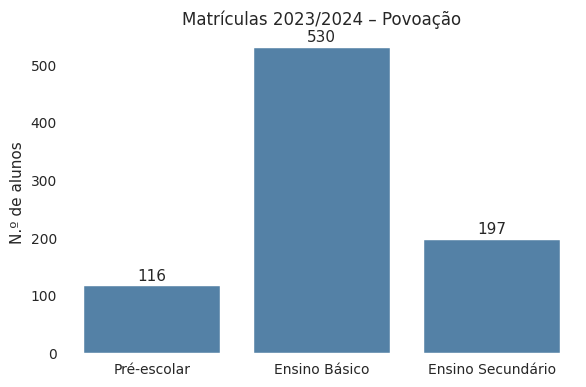

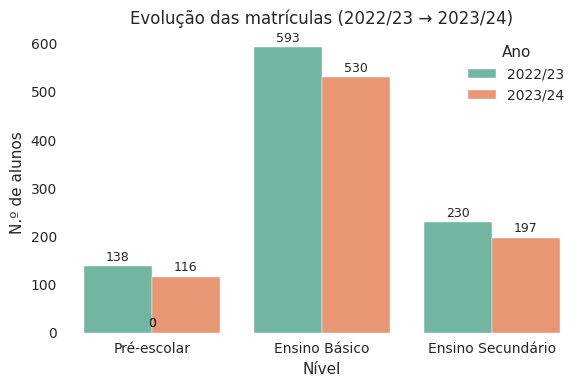

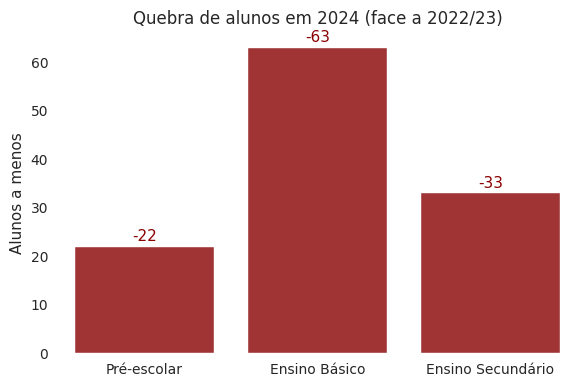

In [48]:
# -*- coding: utf-8 -*-
"""
Gráficos – Educação na Povoação (2023-24)
"""
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams["figure.facecolor"] = "white"
sns.set_style("white")
sns.set_palette("Set2")

# ---------- dados ----------
nivel = ["Pré-escolar", "Ensino Básico", "Ensino Secundário"]
matriculas_23_24 = [116, 530, 197]
quebra_2024 = [22, 63, 33]          # alunos a menos
matriculas_22_23 = [m + q for m, q in zip(matriculas_23_24, quebra_2024)]

# ---------- 1. Matrículas 2023/24 ----------
plt.figure(figsize=(6, 4))
ax1 = sns.barplot(x=nivel, y=matriculas_23_24, color="steelblue")
plt.title("Matrículas 2023/2024 – Povoação")
plt.ylabel("N.º de alunos")

for bar, v in zip(ax1.patches, matriculas_23_24):
    ax1.text(bar.get_x() + bar.get_width()/2, v + 5,
             str(v), ha='center', va='bottom')
plt.tight_layout()
plt.savefig("01_matriculas_23_24.png", dpi=300, facecolor="white")
plt.show()

# ---------- 2. Evolução 2022/23 → 2023/24 ----------
df_evol = pd.DataFrame({
    "Nível": nivel * 2,
    "Ano": ["2022/23"]*3 + ["2023/24"]*3,
    "Alunos": matriculas_22_23 + matriculas_23_24
})
plt.figure(figsize=(6, 4))
ax2 = sns.barplot(x="Nível", y="Alunos", hue="Ano", data=df_evol)
plt.title("Evolução das matrículas (2022/23 → 2023/24)")
plt.ylabel("N.º de alunos")

for bar in ax2.patches:
    h = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, h + 5,
             f"{int(h)}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig("02_evolucao_matriculas.png", dpi=300, facecolor="white")
plt.show()

# ---------- 3. Quebra de alunos em 2024 ----------
plt.figure(figsize=(6, 4))
ax3 = sns.barplot(x=nivel, y=quebra_2024, color="firebrick")
plt.title("Quebra de alunos em 2024 (face a 2022/23)")
plt.ylabel("Alunos a menos")

for bar, v in zip(ax3.patches, quebra_2024):
    ax3.text(bar.get_x() + bar.get_width()/2, v + 0.5,
             f"-{v}", ha='center', va='bottom', color='darkred')
plt.tight_layout()
plt.savefig("03_quebra_alunos_2024.png", dpi=300, facecolor="white")
plt.show()

**Empregabilidade por nível de escolaridade**

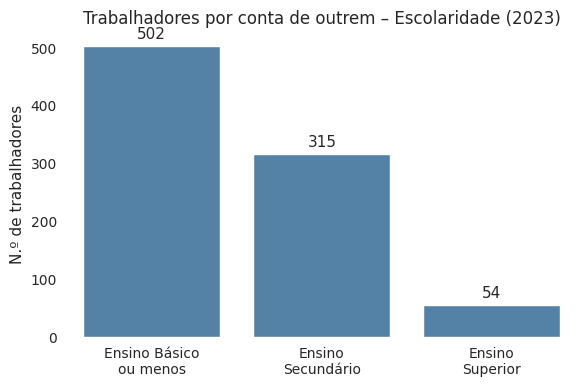

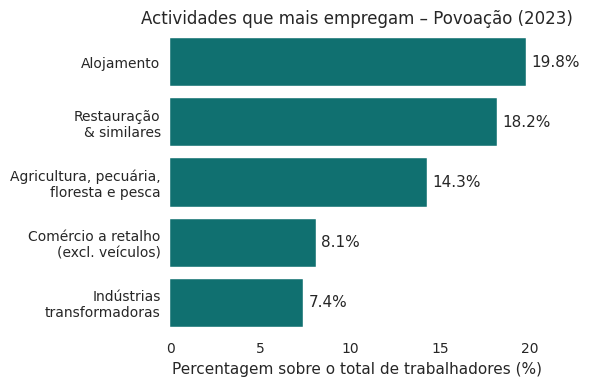

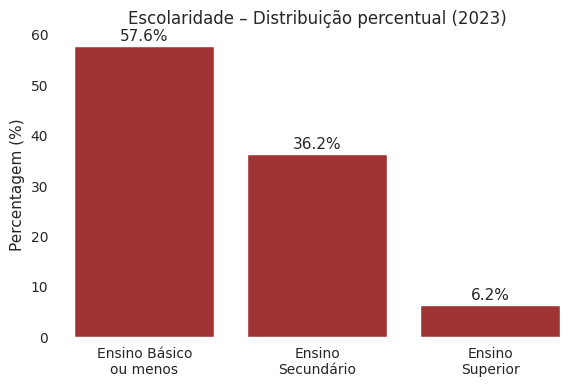

In [49]:
# -*- coding: utf-8 -*-
"""
Gráficos – Empregabilidade na Povoação (2023)
"""
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams["figure.facecolor"] = "white"
sns.set_style("white")
sns.set_palette("Set2")

# ---------- dados ----------
# Escolaridade (trabalhadores por conta de outrem)
esc = ["Ensino Básico\nou menos", "Ensino\nSecundário", "Ensino\nSuperior"]
trab = [502, 315, 54]

# Atividades económicas (%)
ativ = ["Alojamento", "Restauração\n& similares",
        "Agricultura, pecuária,\nfloresta e pesca",
        "Comércio a retalho\n(excl. veículos)",
        "Indústrias\ntransformadoras"]
perc = [19.8, 18.2, 14.3, 8.1, 7.4]

# ---------- 1. Distribuição por escolaridade ----------
plt.figure(figsize=(6, 4))
ax1 = sns.barplot(x=esc, y=trab, color="steelblue")
plt.title("Trabalhadores por conta de outrem – Escolaridade (2023)")
plt.ylabel("N.º de trabalhadores")

for bar, v in zip(ax1.patches, trab):
    ax1.text(bar.get_x() + bar.get_width()/2, v + 8,
             str(v), ha='center', va='bottom')
plt.tight_layout()
plt.savefig("01_emprego_escolaridade.png", dpi=300, facecolor="white")
plt.show()

# ---------- 2. Top 5 actividades (% sobre o total) ----------
plt.figure(figsize=(6, 4))
ax2 = sns.barplot(y=ativ, x=perc, color="teal", orient='h')
plt.title("Actividades que mais empregam – Povoação (2023)")
plt.xlabel("Percentagem sobre o total de trabalhadores (%)")
for bar, v in zip(ax2.patches, perc):
    ax2.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             f"{v}%", va='center', ha='left')
plt.tight_layout()
plt.savefig("02_top5_atividades.png", dpi=300, facecolor="white")
plt.show()

# ---------- 3. Escolaridade em percentagem ----------
total_trab = sum(trab)
perc_esc = [t/total_trab*100 for t in trab]
plt.figure(figsize=(6, 4))
ax3 = sns.barplot(x=esc, y=perc_esc, color="firebrick")
plt.title("Escolaridade – Distribuição percentual (2023)")
plt.ylabel("Percentagem (%)")
for bar, v in zip(ax3.patches, perc_esc):
    ax3.text(bar.get_x() + bar.get_width()/2, v + 0.5,
             f"{v:.1f}%", ha='center', va='bottom')
plt.tight_layout()
plt.savefig("03_escolaridade_percent.png", dpi=300, facecolor="white")
plt.show()